In [3]:

from IPython.core.debugger import set_trace

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
plt.style.use(style = "seaborn")
%matplotlib inline

In [4]:
df = pd.read_csv("IMDb_movies.csv", encoding='ISO-8859-1', error_bad_lines=False)
df.head()

C:\Users\vishal.desai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drÃ¸m,Den sorte drÃ¸m,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [6]:
df.shape

(85855, 22)

In [18]:
df.description

0        The adventures of a female reporter in the 1890s.
1        True story of notorious Australian outlaw Ned ...
2        Two men of high rank are both wooing the beaut...
3        The fabled queen of Egypt's affair with Roman ...
4        Loosely adapted from Dante's Divine Comedy and...
                               ...                        
85850    A psychiatric hospital patient pretends to be ...
85851    A middle-aged veterinary surgeon believes his ...
85852                                                  NaN
85853                                                  NaN
85854    Pep, a 13-year-old boy, is in love with a girl...
Name: description, Length: 85855, dtype: object

In [10]:
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [11]:
print(df.apply(lambda col: col.unique()))

imdb_title_id            [tt0000009, tt0000574, tt0001892, tt0002101, t...
title                    [Miss Jerry, The Story of the Kelly Gang, Den ...
original_title           [Miss Jerry, The Story of the Kelly Gang, Den ...
year                     [1894, 1906, 1911, 1912, 1919, 1913, 1914, 191...
date_published           [1894-10-09, 1906-12-26, 1911-08-19, 1912-11-1...
genre                    [Romance, Biography, Crime, Drama, Drama, Dram...
duration                 [45, 70, 53, 100, 68, 60, 85, 120, 55, 121, 54...
country                  [USA, Australia, Germany, Denmark, Italy, Germ...
language                 [None, nan, English, Italian, German, Danish, ...
director                 [Alexander Black, Charles Tait, Urban Gad, Cha...
writer                   [Alexander Black, Charles Tait, Urban Gad, Geb...
production_company       [Alexander Black Photoplays, J. and N. Tait, F...
actors                   [Blanche Bayliss, William Courtenay, Chauncey ...
description              

In [12]:
print(df.apply(lambda col: col.nunique()))

imdb_title_id            85855
title                    82094
original_title           80852
year                       168
date_published           22012
genre                     1257
duration                   266
country                   4907
language                  4377
director                 34733
writer                   66859
production_company       32050
actors                   85729
description              83611
avg_vote                    89
votes                    14933
budget                    4642
usa_gross_income         14857
worlwide_gross_income    30414
metascore                   99
reviews_from_users        1213
reviews_from_critics       595
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
df.duration.unique()

array([ 45,  70,  53, 100,  68,  60,  85, 120,  55, 121,  54,  96,  61,
        90,  50,  88,  72,  78, 148,  52, 124,  59,  63,  84,  65,  81,
       199,  74,  80,  82,  67,  56, 195,  77,  71,  46, 421, 105,  57,
        58,  73,  64,  62, 163, 300, 116,  69, 125,  97, 138, 112,  91,
        87,  48,  83, 136,  75,  94, 117,  93,  76, 418,  86, 223,  99,
       122, 207, 166,  95,  92,  66, 106, 145, 167,  79, 107, 109, 104,
        89, 102, 150, 131,  47, 119,  98, 110, 143, 137, 128, 101, 183,
       133, 135, 111, 141, 115, 153, 129, 123, 108, 155, 151, 170, 140,
       113, 114, 250, 132, 118, 160, 240, 142, 103, 144,  49, 127, 156,
       130, 165, 147, 152, 226, 227, 231, 218, 200, 210, 225, 243,  51,
       281, 208, 306, 257, 245, 255, 328, 168, 269, 303, 290, 212, 224,
       126, 260, 299, 264, 149, 211, 302, 238, 258, 263, 215, 265, 205,
       237, 220, 285, 293, 267, 216, 241,  43, 134, 184, 261, 197, 244,
       146, 177, 196, 154, 189, 219, 201, 180, 159, 192, 139, 17

In [36]:
df.duration.value_counts().sort_values(ascending=True)

319       1
262       1
264       1
328       1
204       1
       ... 
93     2414
92     2418
100    3106
95     3194
90     5162
Name: duration, Length: 266, dtype: int64

In [39]:
pd.DataFrame(df[df['duration'] == 808])

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85057,tt9047474,La flor,La flor,2016,2018-09-21,"Drama, Fantasy, Musical",808,Argentina,"Catalan, Spanish, French, English, Russian, Ge...",Mariano LlinÃ¡s,...,"Elisa Carricajo, Valeria Correa, Pilar Gamboa,...","A film in six episodes, connected by the same ...",7.7,473,NaN,$ 4032,$ 4032,77.0,5.0,23.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2651e3f4130>,
 'caps': [<matplotlib.lines.Line2D at 0x2651f09cac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2651e3f4460>],
 'medians': [<matplotlib.lines.Line2D at 0x2651f09c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2651e603be0>],
 'means': []}

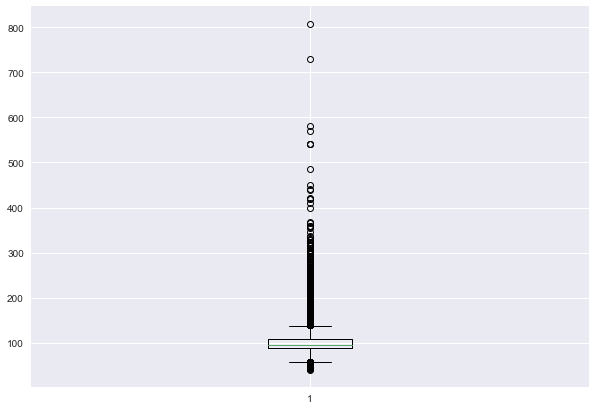

In [20]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['duration'])